In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", font_scale=1.2)

In [ ]:
root = '/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/CXR_Reformat'
os.listdir(root)

['test', 'train', 'val']

In [ ]:
def visualise(data_train, type_data): 
    ax = sns.displot(data=data_train, 
            x="Type of CXR", 
            hue = 'Number of images',
            kind="hist") 
    ax.set(xlabel='Type of CXR image', ylabel='Number of images')

    # plt.title('Label distribution from dataset - {}'.format(type_data))
    root = '/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/CXR_Reformat'
    plt.savefig(os.path.join(root, 'data_distribution_{}_reformat.pdf'.format(type_data)))

In [ ]:
def gerate_visualise(type_data):
    data_train =  pd.DataFrame({ 
        'Type of CXR': [], 
        'Number of images': []
    })
    for i in ['bacteria', 'normal', 'virus']: 
        c = os.listdir(os.path.join(root, type_data, i))
        for j in c:
            new_df = pd.DataFrame({'Type of CXR': [i], 'Number of images': [i]})
            data_train = pd.concat([data_train, new_df])
            
    data_train = data_train.reset_index()
    data_train = data_train.drop(columns=['index'])
    visualise(data_train, type_data)

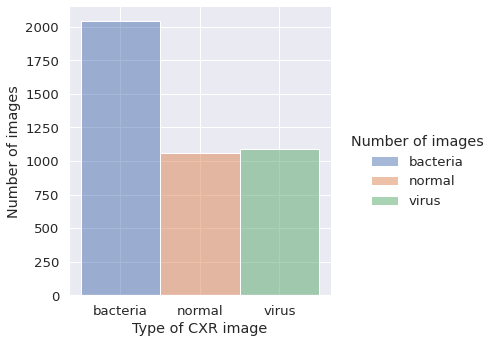

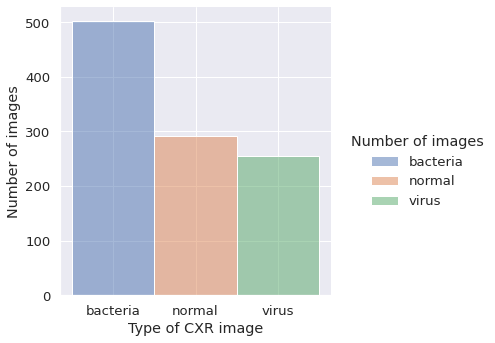

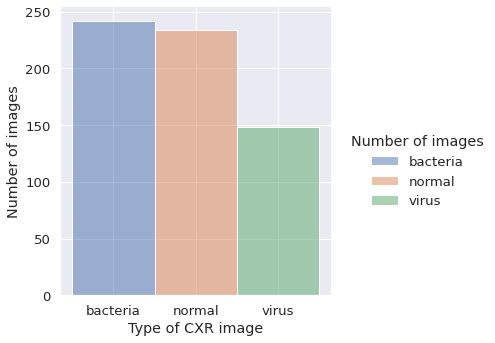

In [ ]:
gerate_visualise('train')
gerate_visualise('val')
gerate_visualise('test')

In [ ]:
def generate_visualise_all():
    def visualise_all(data_train): 
        ax = sns.displot(data=data_train, 
                         x="Type of CXR", 
                         hue = 'Number of images',
                         kind="hist"
                        ) 
        ax.set(xlabel='Type of CXR image', ylabel='Number of images (k)')

        # plt.title('Label distribution from dataset')
        root = '/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/CXR - Collection/'
        plt.savefig(os.path.join(root, 'data_distribution_all.pdf'))
    data_train =  pd.DataFrame({ 
        'Type of CXR': [], 
        'Number of images': []
    })
    for type_data in ['train', 'val', 'test']:
        for i in ['bacteria', 'normal', 'virus']: 
            c = os.listdir(os.path.join(root, type_data, i))
            for j in c:
                new_df = pd.DataFrame({'Type of CXR': [i], 'Number of images': [i]})
            data_train = pd.concat([data_train, new_df])
            
    data_train = data_train.reset_index()
    data_train = data_train.drop(columns=['index'])
    print(data_train)
    visualise_all(data_train)

  Type of CXR Number of images
0    bacteria         bacteria
1      normal           normal
2       virus            virus
3    bacteria         bacteria
4      normal           normal
5      normal           normal
6    bacteria         bacteria
7      normal           normal
8       virus            virus


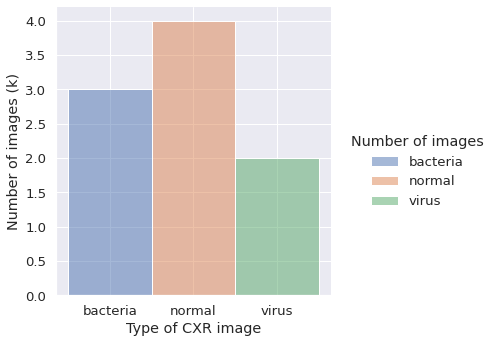

In [ ]:
generate_visualise_all()

In [ ]:
def visualise(data_train, type_data): 
    ax = sns.displot(data=data_train, 
            x="Type of CXR", 
            hue = 'Number of images',
            kind="hist") 
    ax.set(xlabel='Type of CXR image', ylabel='Number of images')

    # plt.title('Label distribution from dataset - {}'.format(type_data))
    root = '/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/CXR_Reformat'
    plt.savefig(os.path.join(root, 'data_distribution_{}_reformat.pdf'.format(type_data)))

# Feature extracting comparison


In [ ]:
import cv2 
from google.colab.patches import cv2_imshow

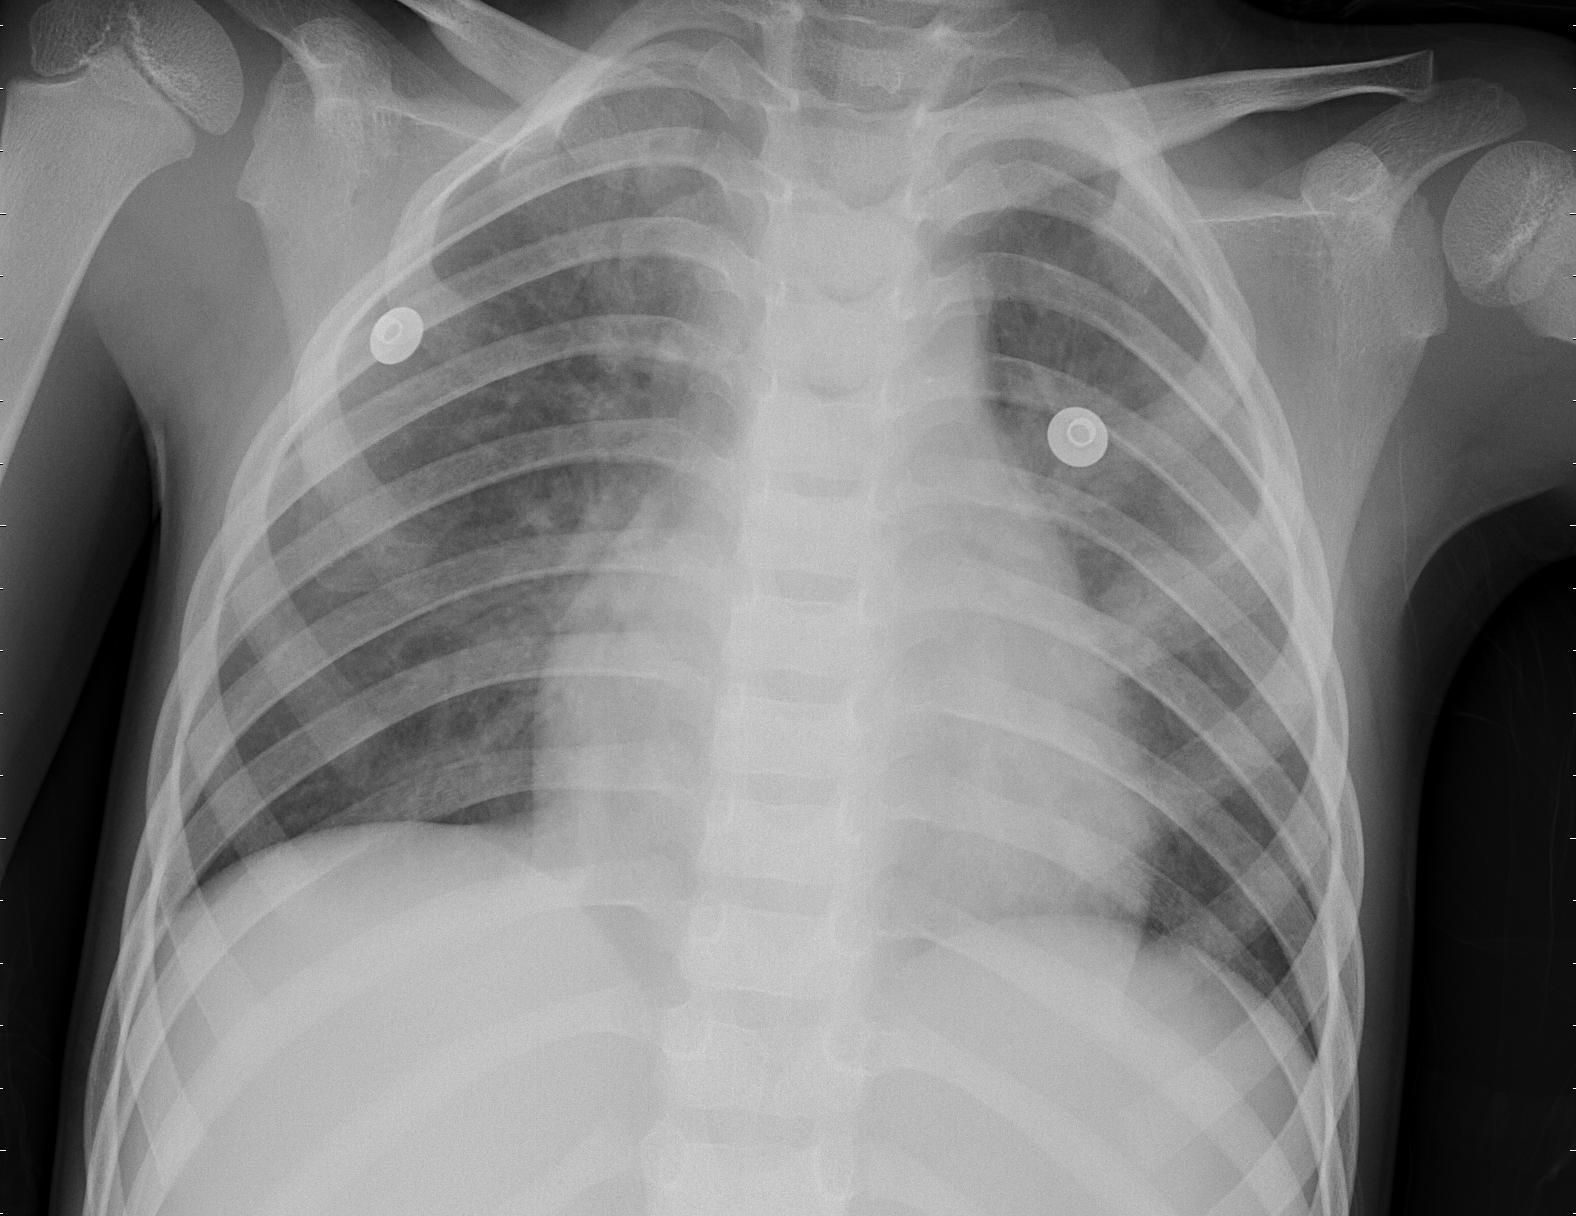

In [ ]:
original_image = cv2.imread('/content/Original.jpeg', 0)
cv2_imshow(original_image)

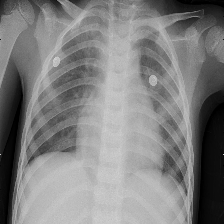

In [ ]:
img = cv2.resize(original_image, (224, 224))
cv2_imshow(img)

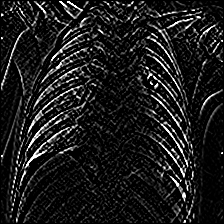

In [ ]:
img_sobel = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 
cv2.imwrite('/content/Sobel.png', img_sobel)
cv2_imshow(img_sobel)

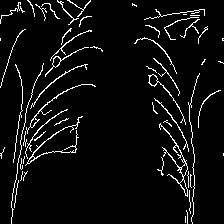

In [ ]:
img_canny = cv2.Canny(image=img, threshold1=100, threshold2=200) # Canny Edge Detection
cv2.imwrite('/content/Canny.png', img_canny)
cv2_imshow(img_canny)

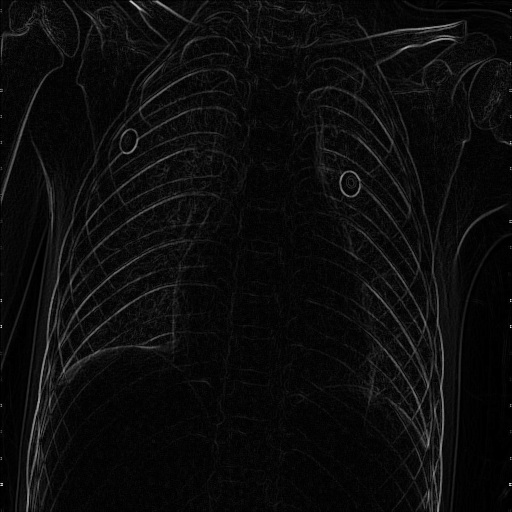

In [ ]:
import numpy as np
def Prewitt_v1(filename, filter): 
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img,(512, 512))
    
    h, w = img.shape 
    print("shape: height " + str(h)+" x width " + str(w) + "\n")

    horizontal = filter
    vertical   = np.transpose(filter)

    newhorizontalImage = np.zeros((h, w))
    newverticalImage   = np.zeros((h, w))
    newgradientImage   = np.zeros((h, w))

    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1]) + \
                             (horizontal[0, 1] * img[i - 1, j]) + \
                             (horizontal[0, 2] * img[i - 1, j + 1]) + \
                             (horizontal[1, 0] * img[i, j - 1]) + \
                             (horizontal[1, 1] * img[i, j]) + \
                             (horizontal[1, 2] * img[i, j + 1]) + \
                             (horizontal[2, 0] * img[i + 1, j - 1]) + \
                             (horizontal[2, 1] * img[i + 1, j]) + \
                             (horizontal[2, 2] * img[i + 1, j + 1])

            newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

            verticalGrad = (vertical[0, 0] * img[i - 1, j - 1]) + \
                           (vertical[0, 1] * img[i - 1, j]) + \
                           (vertical[0, 2] * img[i - 1, j + 1]) + \
                           (vertical[1, 0] * img[i, j - 1]) + \
                           (vertical[1, 1] * img[i, j]) + \
                           (vertical[1, 2] * img[i, j + 1]) + \
                           (vertical[2, 0] * img[i + 1, j - 1]) + \
                           (vertical[2, 1] * img[i + 1, j]) + \
                           (vertical[2, 2] * img[i + 1, j + 1])

            newverticalImage[i - 1, j - 1] = abs(verticalGrad)
            mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            newgradientImage[i - 1, j - 1] = mag

    return newgradientImage


def Prewitt_v2(image): 
       image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)  
       image = cv2.resize(image, (512, 512)) 

       kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
       kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
       x = cv2.filter2D(image, cv2.CV_16S, kernelx)
       y = cv2.filter2D(image, cv2.CV_16S, kernely)
 
       absX = cv2.convertScaleAbs(x)
       absY = cv2.convertScaleAbs(y)
       Prewitt_v2 = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
       return Prewitt_v2

def converter_Prewitt_v2(filename): 
        imagemat = Prewitt_v2(filename)
        cv2_imshow(imagemat)   
        cv2.imwrite('/content/Prewitt.png', imagemat)    

def convert_Prewitt_v2_all(filename):
    converter_Prewitt_v2(filename) 

filename = '/content/Original.jpeg'
converter_Prewitt_v2(filename) 

# Comparison graph

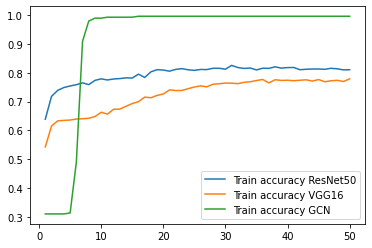

In [1]:
import matplotlib.pyplot as plt

epochs = [ep + 1 for ep in range(50)]
train_acc_resnet = [0.6389,0.7183,0.7391,0.7491 ,0.7544 ,0.7589 ,0.7653 ,0.7591 ,0.7739,0.7792,0.7753,0.7787,0.7801,0.7827,0.7820,0.7956,0.7839,0.8035,0.8111,0.8097,0.8059,0.8121,0.8147,0.8106,0.8087,0.8118,0.8114,0.8159,0.8159,0.8128,0.8259,0.8185,0.8154,0.8168,0.8102,0.8161,0.8156,0.8209,0.8164,0.8183,0.8187,0.8109,0.8125,0.8133,0.8135,0.8123,0.8159,0.8140,0.8104,0.8109]
train_loss_resnet = [0.8181,0.6504,0.6133,0.5862,0.5686,0.5504,0.5529,0.5475,0.5327,0.5215,0.5210,0.5071,0.4995,0.4998,0.5040,0.4784,0.4888,0.4550,0.4383,0.4408,0.4369,0.4243,0.4340,0.4319,0.4334,0.4281,0.4303,0.4220,0.4320,0.4338,0.4185,0.4238,0.4219,0.4239,0.4339,0.4181,0.4325,0.4160,0.4205,0.4278,0.4269,0.4243,0.4324,0.4317,0.4294,0.4282,0.4211,0.4256,0.4255,0.4255]
val_acc_resnet = [0.7655,0.7922,0.7922,0.7979,0.7950,0.7989,0.7331,0.8074,0.8132,0.8160,0.8236,0.7598,0.8198,0.8132,0.8103,0.8141,0.8208,0.8322,0.8427,0.8389,0.8398,0.8398,0.8398,0.8341,0.8398,0.8427,0.8398,0.8427,0.8360,0.8389,0.8360,0.8379,0.8360,0.8437,0.8418,0.8389,0.8398,0.8427,0.8351,0.8427,0.8437,0.8408,0.8398,0.8418,0.8437,0.8446,0.8427,0.8456,0.8437,0.8398]
val_loss_resnet = [0.5510,0.5032,0.5489,0.5146,0.4672,0.4784,0.6669,0.4487,0.4481,0.4477,0.4127,0.4995,0.3957,0.4343,0.4321,0.4191,0.4185,0.3976,0.3863,0.3735,0.3814,0.3865,0.3856,0.3940,0.3817,0.3758,0.3825,0.3806,0.3826,0.3841,0.3835,0.3791,0.3913,0.3791,0.3806,0.3940,0.3815,0.3814,0.3771,0.3799,0.3743,0.3847,0.3823,0.3776,0.3830,0.3855,0.3774,0.3890,0.3769,0.3796]


train_acc_vgg16 = [0.5426,0.6153,0.6332,0.6349,0.6361,0.6396,0.6406,0.6423,0.6482,0.6632,0.6566,0.6735,0.6742,0.6840,0.6933,0.7000,0.7157,0.7136,0.7217,0.7267,0.7408,0.7386,0.7389,0.7451,0.7508,0.7548,0.7515,0.7606,0.7622,0.7646,0.7641,0.7625,0.7672,0.7691,0.7734,0.7770,0.7651,0.7761,0.7737,0.7744,0.7727,0.7744,0.7758,0.7715,0.7768,0.7691,0.7725,0.7741,0.7699,0.7794]
train_loss_vgg16 = [1.3748,0.9629,0.8764,0.8819,0.8405,0.8788,0.8727,0.8216,0.7866,0.7556,0.7636,0.7353,0.7304,0.7165,0.7040,0.6797,0.6686,0.6547,0.6397,0.6326,0.6169,0.6089,0.6045,0.6022,0.5725,0.5887,0.5853,0.5825,0.5550,0.5550,0.5578,0.5597,0.5559,0.5510,0.5406,0.5416,0.5527,0.5382,0.5374,0.5470,0.5390,0.5365,0.5412,0.5435,0.5317,0.5359,0.5410,0.5403,0.5368,0.5309]
val_acc_vgg16 = [0.6616,0.6511,0.7102,0.6969,0.6969,0.6511,0.698,0.7083,0.7169,0.7188,0.7178,0.7731,0.7779,0.7807,0.7684,0.7979,0.7950,0.7855,0.7950,0.7931,0.7865,0.7979,0.7903,0.8008,0.8074,0.7960,0.8055,0.8065 ,0.8074,0.8103,0.8132,0.8084,0.8055,0.8065,0.8036,0.8027,0.8065,0.8017,0.8093,0.8065,0.8036,0.8065,0.8046,0.8093 ,0.8084,0.8074,0.8084,0.8065,0.8074,0.8084]
val_loss_vgg16 = [0.8426,0.7908,0.6523,0.7061,0.7000,0.8041,0.7163,0.6649,0.6490,0.6393,0.6285,0.5713,0.5672,0.5557,0.5605,0.5306,0.5284,0.5148,0.5150,0.5186,0.5066,0.4955,0.5135,0.4860,0.4898,0.4978,0.4895,0.4998,0.4879,0.4826,0.4817,0.4851,0.4826,0.4753,0.4811,0.4789,0.4746,0.4746,0.4723,0.4713,0.4770,0.4753,0.4745,0.4727,0.4739,0.4739,0.4739,0.4743,0.4742,0.4733]

train_loss_gcn = [3912.145751953125, 4017.438720703125, 3244.273193359375, 3287.118408203125, 2209.109619140625, 2095.033447265625, 1768.4183349609375, 1512.795654296875, 1182.6090087890625, 1015.859375, 825.10302734375, 860.184326171875, 788.673095703125, 529.084228515625, 463.10479736328125, 439.0864562988281, 375.75201416015625, 292.7358093261719, 341.1072692871094, 184.7669677734375, 162.41650390625, 216.45443725585938, 179.56529235839844, 109.12067413330078, 82.69580078125, 94.7291030883789, 40.86404800415039, 21.6605167388916, 86.48480224609375, 47.5871467590332, 33.27568817138672, 18.246856689453125, 25.351892471313477, 18.713214874267578, 40.442806243896484, 17.379276275634766, 18.622264862060547, 44.223045349121094, 8.087854385375977, 22.412317276000977, 8.568493843078613, 7.717408180236816, 33.36090850830078, 0.441233366727829, 20.412559509277344, 5.577650547027588, 9.84589958190918, 7.525600433349609, 5.045571327209473, 5.045571327209473]
val_loss_gcn = [26424.83984375, 21792.458984375, 16714.8515625, 11642.3486328125, 7010.6533203125, 2441.848388671875, 289.25653076171875, 13.39816665649414, 5.905368804931641, 8.554853439331055, 11.227914810180664, 13.784685134887695, 15.951003074645996, 17.715028762817383, 19.181425094604492, 20.560293197631836, 21.832460403442383, 22.89535140991211, 23.851625442504883, 24.752981185913086, 25.551488876342773, 26.26079559326172, 26.907207489013672, 27.511693954467773, 28.00760269165039, 28.498668670654297, 28.98531723022461, 29.470903396606445, 29.8697566986084, 30.212350845336914, 30.48255729675293, 30.6983699798584, 30.904056549072266, 31.076168060302734, 31.22380828857422, 31.31036949157715, 31.328828811645508, 31.33447265625, 31.359994888305664, 31.39468765258789, 31.420339584350586, 31.460935592651367, 31.50869369506836, 31.558914184570312, 31.603065490722656, 31.643203735351562, 31.7074031829834, 31.766019821166992, 31.81177520751953, 31.86177520751953]
val_acc_gcn = [0.26558842306873803, 0.26558842306873803, 0.26558842306873803, 0.26558842306873803, 0.2726111938710364, 0.4735050010640562, 0.912960204298787, 0.977442008938072, 0.9851032134496701, 0.9861672696318365, 0.987231325814003, 0.9895722494147691, 0.9908491168333688, 0.9910619280698021, 0.9923387954884018, 0.9929772291977016, 0.9929772291977016, 0.993190040434135, 0.9936156629070015, 0.9938284741434348, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.994041285379868, 0.9938284741434348, 0.9938284741434348, 0.9938284741434348, 0.9938284741434348, 0.9938284741434348, 0.9938284741434348]
train_acc_gcn = [0.31, 0.31, 0.31, 0.31, 0.31333333333333335, 0.49, 0.91, 0.98, 0.99, 0.99, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667, 0.9966666666666667]

plt.plot(epochs, train_acc_resnet, label='Train accuracy ResNet50')
plt.plot(epochs, train_acc_vgg16, label='Train accuracy VGG16')
plt.plot(epochs, train_acc_gcn, label='Train accuracy GCN')
# plt.plot(epochs, train_loss_resnet, label='Train loss ResNet50')
# plt.plot(epochs, train_loss_vgg16, label='Train accuracy VGG16')
plt.legend()
# plt.title('Training comparison among GCN, ResNet50, VGG16')
plt.show()

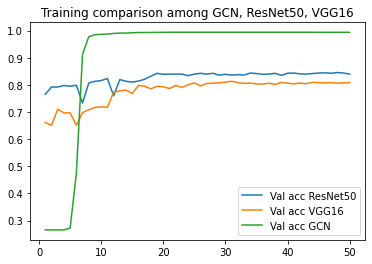

In [ ]:
plt.plot(epochs, val_acc_resnet, label='Val acc ResNet50')
plt.plot(epochs, val_acc_vgg16, label='Val acc VGG16')
plt.plot(epochs, val_acc_gcn, label='Val acc GCN')
# plt.plot(epochs, train_acc_resnet, label='Train loss ResNet50')
# plt.plot(epochs, train_loss_vgg16, label='Train accuracy VGG16')
plt.legend()
plt.title('Training comparison among GCN, ResNet50, VGG16')
plt.show()

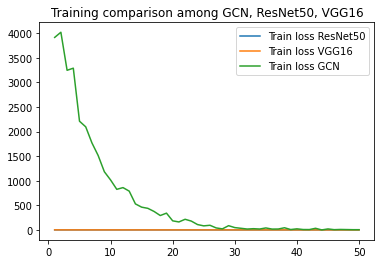

In [ ]:
plt.plot(epochs, train_loss_resnet, label='Train loss ResNet50')
plt.plot(epochs, train_loss_vgg16, label='Train loss VGG16')
plt.plot(epochs, train_loss_gcn, label ='Train loss GCN')
# plt.plot(epochs, train_loss_resnet, label='Train loss ResNet50')
# plt.plot(epochs, train_loss_vgg16, label='Train accuracy VGG16')
plt.legend()
plt.title('Training comparison among GCN, ResNet50, VGG16')
plt.show()

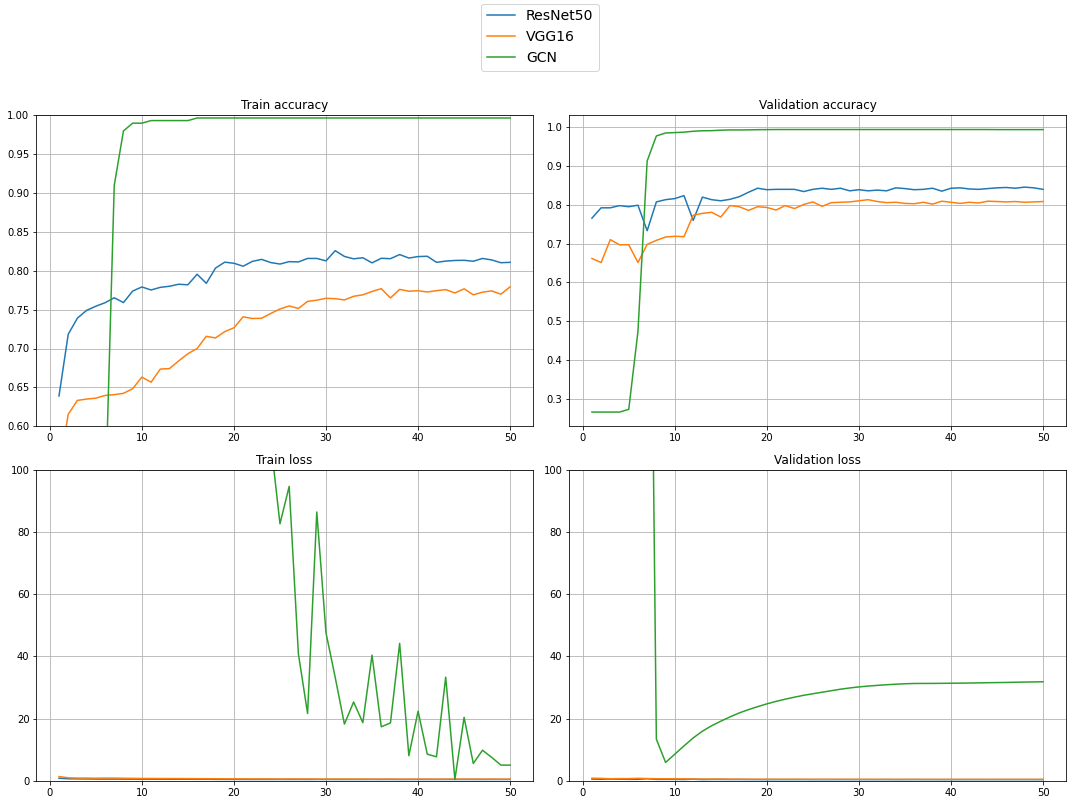

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].grid()
axs[0, 0].plot(epochs, train_acc_resnet, label='Train accuracy ResNet50')
axs[0, 0].plot(epochs, train_acc_vgg16, label='Train accuracy VGG16')
axs[0, 0].plot(epochs, train_acc_gcn, label='Train accuracy GCN')
axs[0, 0].set_title('Train accuracy')
axs[0, 0].set_ylim(0.5, 1)


axs[0, 1].grid()
axs[0, 1].plot(epochs, val_acc_resnet, label='Val acc ResNet50')
axs[0, 1].plot(epochs, val_acc_vgg16, label='Val acc VGG16')
axs[0, 1].plot(epochs, val_acc_gcn, label='Val acc GCN')
axs[0, 1].set_title('Validation accuracy')
axs[0, 0].set_ylim(0.6, 1)



axs[1, 0].grid()
axs[1, 0].plot(epochs, train_loss_resnet, label='Train loss ResNet50')
axs[1, 0].plot(epochs, train_loss_vgg16, label='Train loss VGG16')
axs[1, 0].plot(epochs, train_loss_gcn, label ='Train loss GCN')
axs[1, 0].set_title('Train loss')
axs[1, 0].set_ylim(0, 100)


axs[1, 1].grid()
axs[1, 1].plot(epochs, val_loss_resnet, label='ResNet50')
axs[1, 1].plot(epochs, val_loss_vgg16, label='VGG16')
axs[1, 1].plot(epochs, val_loss_gcn, label ='GCN')
axs[1, 1].set_title('Validation loss')
axs[1, 1].set_ylim(0, 100)

handles, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=1, fontsize=14, bbox_to_anchor=(0.5, 1.01))
fig.tight_layout()
plt.savefig('/content/training-curve.pdf', bbox_inches='tight')